# CNN으로 MNIST 데이터셋 들여다보기

### 데이터셋 불러오기

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_train, X_test = x_train/255, x_test/255

print(X_train.shape, X_test.shape)
X_train = X_train.reshape((60000,28,28,1))
X_test = X_test.reshape((10000, 28, 28, 1))
print(X_train.shape, X_test.shape)




(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### reshape 하는 이유?
- (60000, 28, 28) 대신 (60000, 28,28,1) 로 reshape
- (10000, 28, 28) 대신 (10000, 28, 28, 1) 로 reshape
- 채널차원이 늘어서 input도 동일하게 늘려줘야함.

# 간단한 Neural Network
- feature map은 3개만.
- weight 수도 줄어듦

In [2]:
from tensorflow.keras import layers, models

In [6]:
model = models.Sequential([
    layers.Conv2D(3, kernel_size=(3,3), strides=(1,1),
                 padding='same', activation='relu',
                 input_shape=(28,28,1)),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 3)         30        
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 3)         0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 3)         0         
                                                                 
 flatten_2 (Flatten)         (None, 588)               0         
                                                                 
 dense_3 (Dense)             (None, 1000)              589000    
                                                                 
 dense_4 (Dense)             (None, 10)                10010     
                                                      

### 학습 전이라 랜덤weight

In [7]:
conv = model.layers[0]
conv_weights = conv.weights[0].numpy()
conv_weights.mean(), conv_weights.std()


(-0.073141426, 0.22345652)

Text(0, 0.5, 'count')

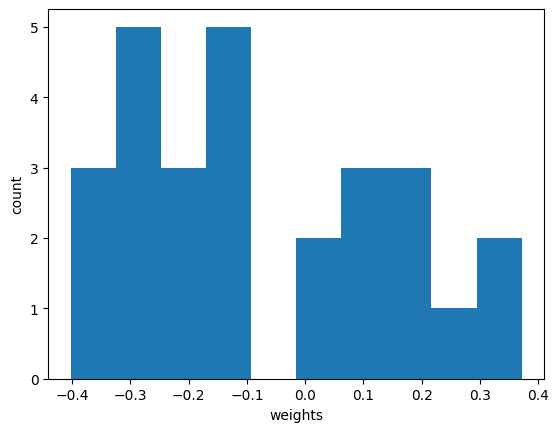

In [8]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('count')

## 학습

In [9]:
%%time

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test))


Epoch 1/5


1875/1875 [==============================] - 8s 4ms/step - loss: 0.2912 - accuracy: 0.9096 - val_loss: 0.0925 - val_accuracy: 0.9688
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1234 - accuracy: 0.9601 - val_loss: 0.0727 - val_accuracy: 0.9776
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0913 - accuracy: 0.9708 - val_loss: 0.0561 - val_accuracy: 0.9824
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0755 - accuracy: 0.9752 - val_loss: 0.0502 - val_accuracy: 0.9836
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0625 - accuracy: 0.9794 - val_loss: 0.0469 - val_accuracy: 0.9846
CPU times: total: 3min 50s
Wall time: 41.2 s


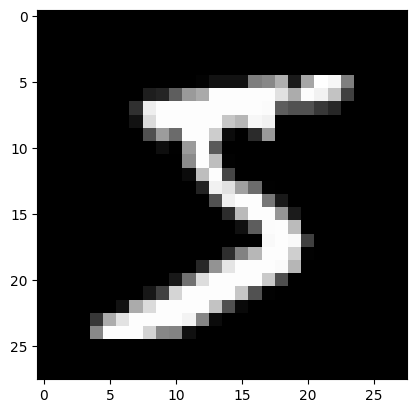

In [12]:
plt.imshow(X_train[0], cmap='gray');

In [13]:
inputs = X_train[0].reshape(-1, 28, 28, 1)
conv_layer_output = tf.keras.Model(model.input, model.layers[0].output)
conv_layer_output.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2_input (InputLayer  [(None, 28, 28, 1)]       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 3)         30        
                                                                 
Total params: 30 (120.00 Byte)
Trainable params: 30 (120.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
feature_maps = conv_layer_output.predict(inputs)
feature_maps.shape

1/1 [==============================] - 0s 60ms/step


(1, 28, 28, 3)

### 모델정의시 feature map 3개로 해서 추출된 feature 3개를 볼 수 있음

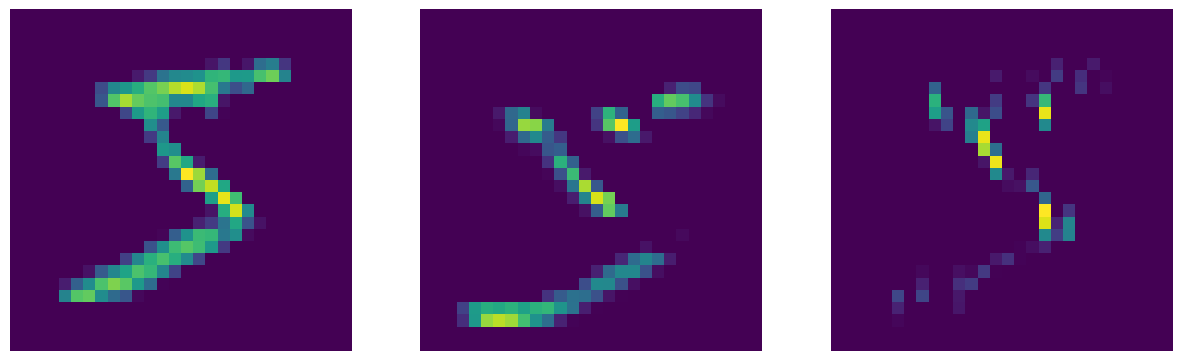

In [15]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
for i in range(3):
    ax[i].imshow(feature_maps[0, :, :, i])
    ax[i].axis('off')

plt.show()

# 모델에서 채널수 8로 증가

In [17]:
model = models.Sequential([
    layers.Conv2D(8, kernel_size=(3,3), strides=(1,1),
                 padding='same', activation='relu',
                 input_shape=(28,28,1)),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 8)         0         
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_5 (Dense)             (None, 1000)              1569000   
                                                                 
 dense_6 (Dense)             (None, 10)                10010     
                                                      

In [19]:
%%time

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1859 - accuracy: 0.9424 - val_loss: 0.0737 - val_accuracy: 0.9763
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0718 - accuracy: 0.9778 - val_loss: 0.0530 - val_accuracy: 0.9833
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0480 - accuracy: 0.9842 - val_loss: 0.0426 - val_accuracy: 0.9870
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0359 - accuracy: 0.9884 - val_loss: 0.0406 - val_accuracy: 0.9880
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0283 - accuracy: 0.9904 - val_loss: 0.0350 - val_accuracy: 0.9893
CPU times: total: 15min 21s
Wall time: 1min 45s


In [27]:
conv_layers_output = tf.keras.Model(model.input, model.layers[0].output)

def draw_feature_maps(n):
    inputs = X_train[n].reshape(-1,28,28,1)
    feature_maps = conv_layers_output.predict(inputs)
    
    fig, ax = plt.subplots(1,9,figsize=(15,5))
    
    ax[0].imshow(inputs[0, :, :, 0], cmap='gray');
    for i in range(1,9):
        ax[i].imshow(feature_maps[0, :, :, i-1])
        ax[i].axis('off')
    
    plt.show()


1/1 [==============================] - 0s 38ms/step


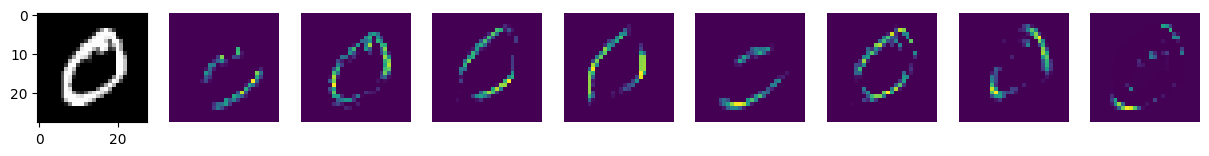

In [26]:
draw_feature_maps(1)

1/1 [==============================] - 0s 33ms/step


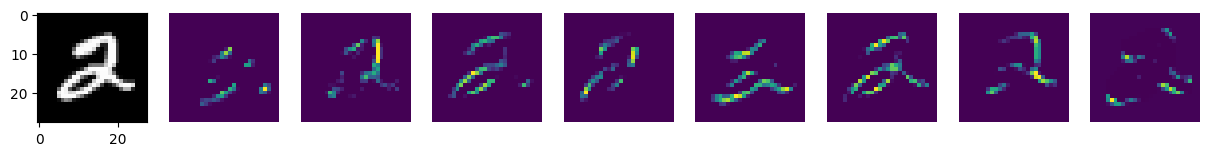

In [28]:
draw_feature_maps(5)